# First We Import all the libraries

In [4]:
# Importing All Required Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

# Data Preprocessing

## Importing Dataset and exploring the columns. 

In [5]:
data = pd.read_csv("mushrooms 2.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


--- As we see, the class is what we need to classify according to the other columns, we are going to check for null values and unnecessary columns. ---

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


The describe function gives us info each column and how many "unique"values in it.  From it, we see that the veil type has only 1 value, which means it can be dropped as it doesn't affect our model. 

In [7]:
data = data.drop(columns="veil-type")

Let's re-run our describe and see the info one more time. 

In [8]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


Let's check if we have null values.

In [9]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Therefore, no null values. 

## Data Visualization & Preparation

## To know which class is larger than the other

c:\Users\Moham\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


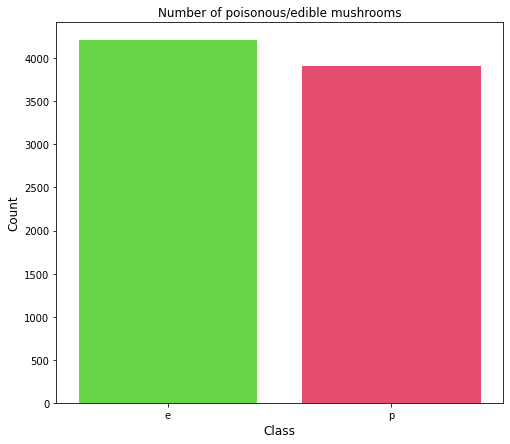

In [10]:
count = data['class'].value_counts()
plt.figure(figsize=(8,7))
sb.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=900)
plt.show()

## Encoding

Encoding the columns to change the categorical data types to numeric which can be used in visualization, correlation and model training. 

In [11]:
encoder = LabelEncoder()

for n in data.columns:
    data[n] = encoder.fit_transform(data[n])

## Most Prominant Factors: 

The function aims to print which factors affect more in the classification. As well as remove any column whose affect to the DS is less than 0.1

In [12]:
featureTotalArr = []
for col in data.columns[2: 23]:
    featureTotal = 1
    for value in data[col].value_counts(normalize=True):
        featureTotal = featureTotal * value 
        if value>=.9:
            data.drop(columns = [col])

    featureTotalArr.append((col, featureTotal))

def getTotal(item):
    return item[1]

featureTotalArr.sort(key=getTotal)

print('Most prominent factors are: \n')
for item in featureTotalArr:
    print(item[0])

Most prominent factors are: 

gill-color
cap-color
stalk-color-above-ring
spore-print-color
stalk-color-below-ring
odor
habitat
veil-color
ring-type
population
cap-surface
stalk-root
stalk-surface-above-ring
ring-number
stalk-surface-below-ring
gill-attachment
gill-spacing
gill-size
bruises
stalk-shape


### Visualization of Most Prominat Factors Using Correlation

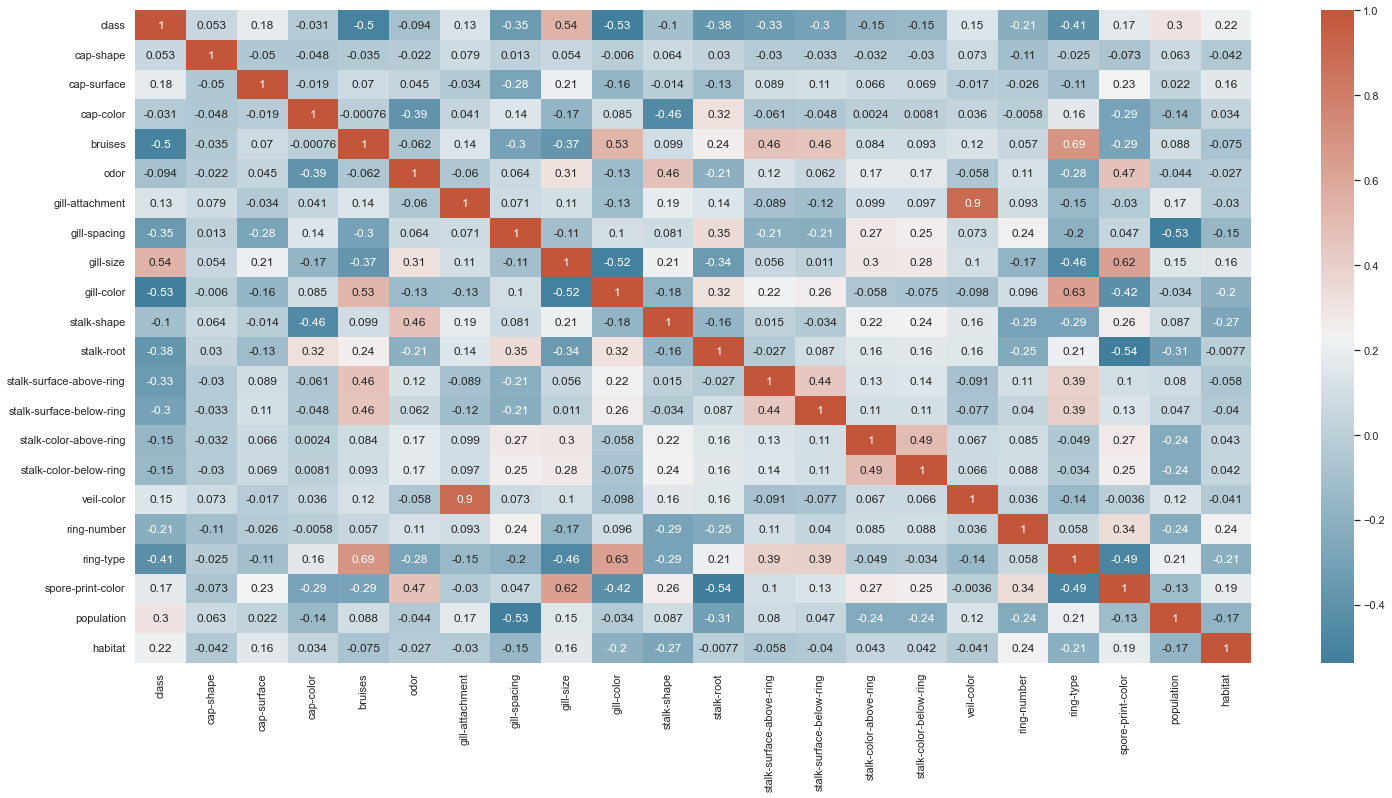

In [13]:
corr = data.corr()

sb.set(font_scale = 1)
plt.subplots(figsize=(25, 12))
cmap = sb.diverging_palette(230, 20, as_cmap=True);
sb.heatmap(corr, annot=True, cmap=cmap);

## Preparing for classifcation

In [14]:
x = data.drop(['class'], axis=1)  
y = data["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Classification Models

## Decision Tree Classifier

In [15]:
model = DecisionTreeClassifier(max_depth=6,random_state=42)
model.fit(x_train,y_train)
model.score(x_train , y_train)

predict= model.predict(x_test)
print('\nDecisionTreeClassifier Accuracy: ' + str(accuracy_score(y_test , predict)))


DecisionTreeClassifier Accuracy: 0.9987694831829368


To visualize what factors where most important to our classifier:

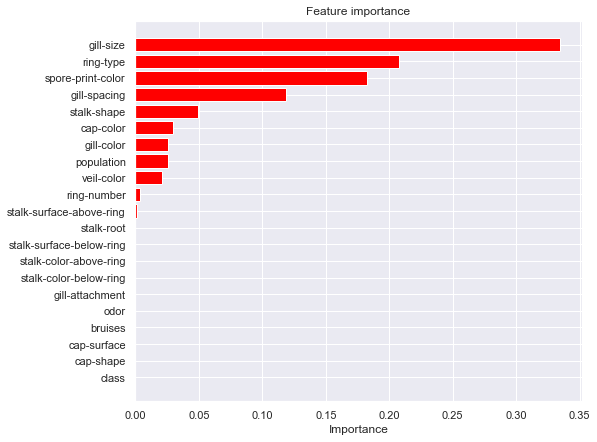

In [16]:
features_list = data.columns.values
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

### Test for overfitting using confusion matrix

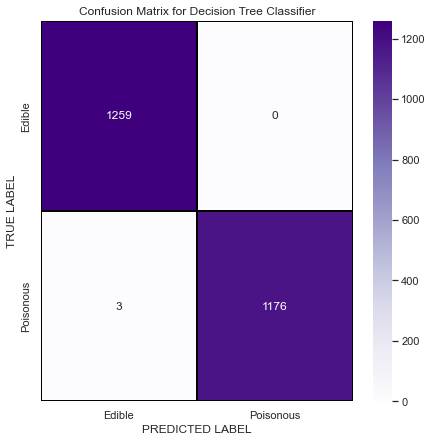

In [17]:

cm = confusion_matrix(y_test, predict)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

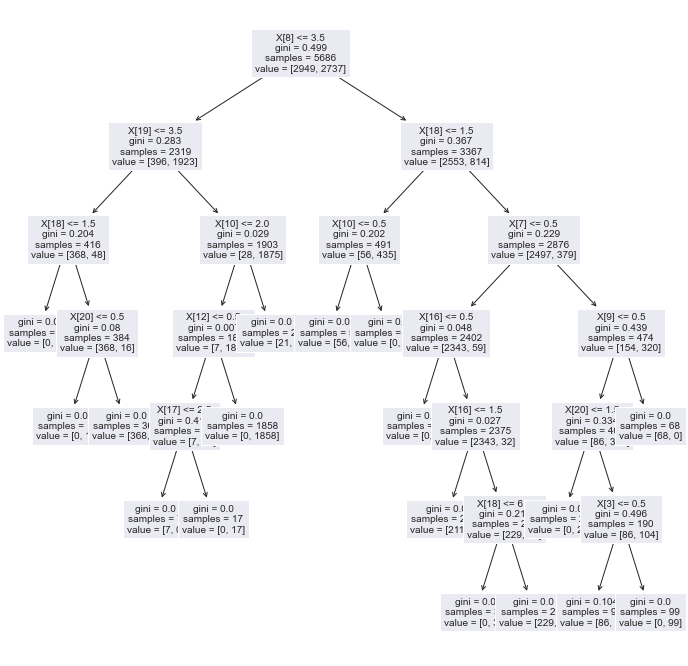

In [18]:
# plot tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(model, fontsize=10)
plt.show()

## Random Forest Classifier

In [19]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 5,max_depth=6)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

print('\n random forest Classifier Accuracy: ' + str(accuracy_score(y_test , y_pred)))


 random forest Classifier Accuracy: 0.9901558654634947


### Test for overfitting using confusion matrix

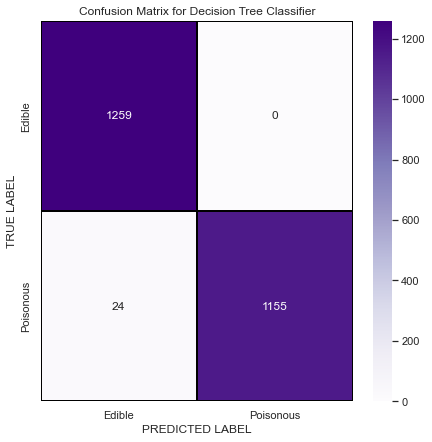

In [20]:

cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## Naiive Base Classification

In [21]:
nb = NB()
nb.fit(x_train,y_train)

nb_predict=nb.predict(x_test)
print('\n naive baye\'s Classifier Accuracy: ' + str(accuracy_score(y_test , nb_predict)))


 naive baye's Classifier Accuracy: 0.9118129614438064


### Test for overfitting using confusion matrix

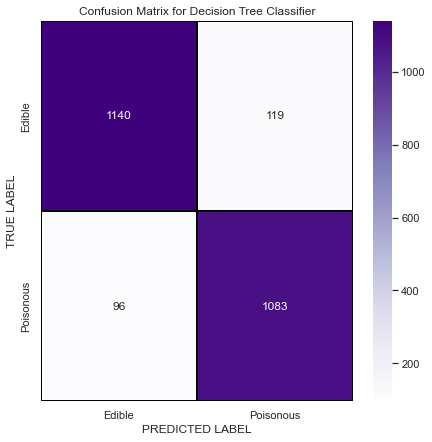

In [22]:
cm = confusion_matrix(y_test, nb_predict)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train,y_train)
lrpredict=lr.predict(x_test)

print('\n Logistic Regression\'s Classifier Accuracy: ' + str(accuracy_score(y_test ,lrpredict)))



 Logistic Regression's Classifier Accuracy: 0.9528301886792453


### Test for overfitting using confusion matrix

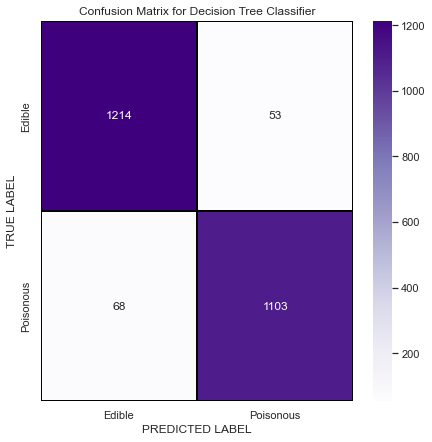

In [89]:

cm = confusion_matrix(y_test, lrpredict)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## KNN Classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
res =neigh.predict(x_test)
accuracy = accuracy_score(y_test, res)
print (accuracy)


0.9979491386382281


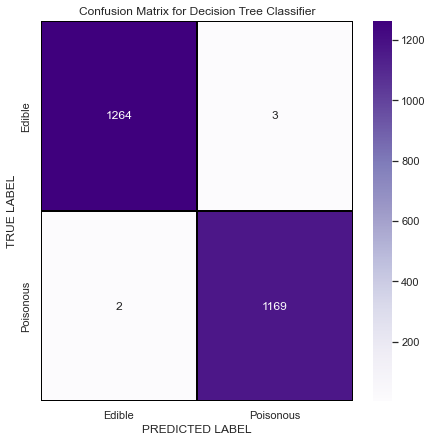

In [92]:

cm = confusion_matrix(y_test, res)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()